In [340]:
import functions as funcs
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import zarr
from cartopy import crs as ccrs
from netCDF4 import Dataset

In [341]:
tropical_c128_output_init = '/home/ajdas/pace/output.zarr/'

ds = xr.open_zarr(store=zarr.DirectoryStore(path=tropical_c128_output_init), consolidated=False)
uz = funcs.unstagger_coordinate(ds['u'].values[:, 5, :, :, -1])
vz = funcs.unstagger_coordinate(ds['v'].values[:, 5, :, :, -1])
tz = funcs.unstagger_coordinate(ds['pt'].values[:, 5, :, :, -1])
delpz = ds['delp'].values[:, 5, :, :]
delzz = ds['delz'].values[:, 5, :, :]
psz = funcs.unstagger_coordinate(ds['ps'].values[:, 5, :, :])
lonz = np.rad2deg(ds['lon'].values)[5]
latz = np.rad2deg(ds['lat'].values)[5]

wspdz = np.sqrt(uz**2 + uz**2)

In [342]:
for time in range(len(wspdz)):
    print(time, np.nanmin(wspdz[time, :, :]), np.nanmax(wspdz[time, :, :]))

0 0.0 28.21997393228973
1 nan nan


/tmp/ipykernel_26405/3715146657.py:2: RuntimeWarning: All-NaN slice encountered
  print(time, np.nanmin(wspdz[time, :, :]), np.nanmax(wspdz[time, :, :]))


In [335]:
tropical_c128_input_restart = '/home/ajdas/pace/restart_data/v5.0/fv_core.res.tile6.nc'
data = Dataset(tropical_c128_input_restart, "r")
u = np.transpose(funcs.unstagger_coordinate(np.array(data["u"][0]))[-1], [1, 0])
v = np.transpose(funcs.unstagger_coordinate(np.array(data["v"][0]))[-1], [1, 0])
delp = np.transpose(np.array(data["delp"][0]), [2, 1, 0])
delz = np.transpose(np.array(data["DZ"][0]), [2, 1, 0])
t = np.transpose(np.array(data["T"][0, -1]), [1, 0])
data.close()
tropical_c128_input_restart = '/home/ajdas/pace/restart_data/v5.0/grid_spec.tile6.nc'
data = Dataset(tropical_c128_input_restart, "r")
lon = np.transpose(np.array(data["grid_lon"]), [1, 0])
lat = np.transpose(np.array(data["grid_lat"]), [1, 0])
data.close()

In [336]:
delzz.shape

(1, 128, 128, 79)

In [337]:
lon_diff = lon - lonz
lat_diff = lat - latz
print("Longitude difference min, max:", lon_diff.min(), lon_diff.max())
print("Latitude difference min, max:", lat_diff.min(), lat_diff.max())


Longitude difference min, max: -1.2337329735601088e-05 1.646955098522085e-05
Latitude difference min, max: -2.81611148977845e-06 3.5499051520559988e-06


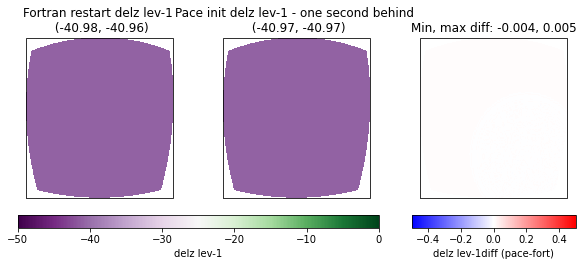

In [338]:
var_f = delz[:, :, -1]
var_p = delzz[0, :, :, -1]
var_diff = var_p - var_f
var = "delz lev-1"
vmin, vmax = -50, 0
vmind, vmaxd = -5e-1, 5e-1
fig = plt.figure(figsize = (10, 3.5))
gs = GridSpec(2, 3, height_ratios=[1, .08])
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180))
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.Robinson(central_longitude=180))
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.Robinson(central_longitude=180))
cax1 = fig.add_subplot(gs[1, :2])
cax3 = fig.add_subplot(gs[1, 2])

f1 = ax1.pcolormesh(lon, lat, var_f, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
ax2.pcolormesh(lonz, latz, var_p, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
f3 = ax3.pcolormesh(lonz, latz, var_diff, vmin=vmind, vmax=vmaxd, cmap="bwr", transform=ccrs.PlateCarree())

ax1.set_title("Fortran restart %s \n (%.2f, %.2f)" % (var, var_f.min(), var_f.max()))
ax2.set_title("Pace init %s - one second behind \n (%.2f, %.2f)" % (var, var_p.min(), var_p.max()))
ax3.set_title("Min, max diff: %.3f, %.3f" % (var_diff.min(), var_diff.max()))

plt.colorbar(f1, cax=cax1, label=var, orientation="horizontal")
plt.colorbar(f3, cax=cax3, label=var+"diff (pace-fort)", orientation="horizontal")

plt.show()

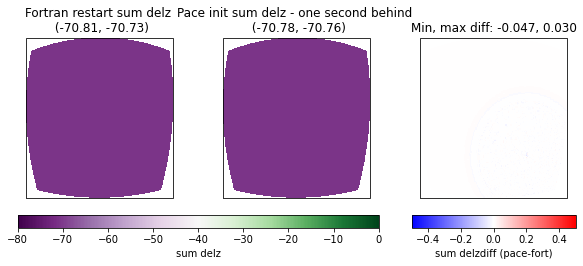

In [339]:
var_f = np.sum(delz, 2)/1000
var_p = np.sum(delzz[0, :, :], 2)/1000
var_diff = var_p - var_f
var = "sum delz"
vmin, vmax = -80, 0
vmind, vmaxd = -5e-1, 5e-1
fig = plt.figure(figsize = (10, 3.5))
gs = GridSpec(2, 3, height_ratios=[1, .08])
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180))
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.Robinson(central_longitude=180))
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.Robinson(central_longitude=180))
cax1 = fig.add_subplot(gs[1, :2])
cax3 = fig.add_subplot(gs[1, 2])

f1 = ax1.pcolormesh(lon, lat, var_f, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
ax2.pcolormesh(lonz, latz, var_p, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
f3 = ax3.pcolormesh(lonz, latz, var_diff, vmin=vmind, vmax=vmaxd, cmap="bwr", transform=ccrs.PlateCarree())

ax1.set_title("Fortran restart %s \n (%.2f, %.2f)" % (var, var_f.min(), var_f.max()))
ax2.set_title("Pace init %s - one second behind \n (%.2f, %.2f)" % (var, var_p.min(), var_p.max()))
ax3.set_title("Min, max diff: %.3f, %.3f" % (var_diff.min(), var_diff.max()))

plt.colorbar(f1, cax=cax1, label=var, orientation="horizontal")
plt.colorbar(f3, cax=cax3, label=var+"diff (pace-fort)", orientation="horizontal")

plt.show()

In [315]:
delz.min(), delz.max()

(-8665.624, -40.964695)

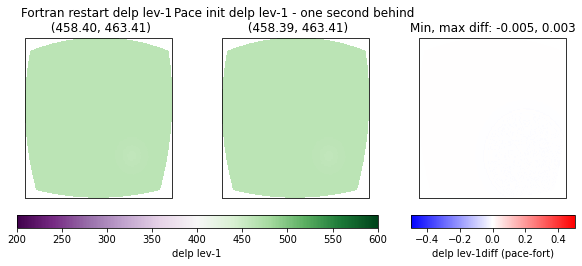

In [300]:
var_f = delp[:, :, -1]
var_p = delpz[0, :, :, -1]
var_diff = var_p - var_f
var = "delp lev-1"
vmin, vmax = 200, 600
vmind, vmaxd = -5e-1, 5e-1
fig = plt.figure(figsize = (10, 3.5))
gs = GridSpec(2, 3, height_ratios=[1, .08])
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180))
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.Robinson(central_longitude=180))
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.Robinson(central_longitude=180))
cax1 = fig.add_subplot(gs[1, :2])
cax3 = fig.add_subplot(gs[1, 2])

f1 = ax1.pcolormesh(lon, lat, var_f, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
ax2.pcolormesh(lonz, latz, var_p, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
f3 = ax3.pcolormesh(lonz, latz, var_diff, vmin=vmind, vmax=vmaxd, cmap="bwr", transform=ccrs.PlateCarree())

ax1.set_title("Fortran restart %s \n (%.2f, %.2f)" % (var, var_f.min(), var_f.max()))
ax2.set_title("Pace init %s - one second behind \n (%.2f, %.2f)" % (var, var_p.min(), var_p.max()))
ax3.set_title("Min, max diff: %.3f, %.3f" % (var_diff.min(), var_diff.max()))

plt.colorbar(f1, cax=cax1, label=var, orientation="horizontal")
plt.colorbar(f3, cax=cax3, label=var+"diff (pace-fort)", orientation="horizontal")

plt.show()

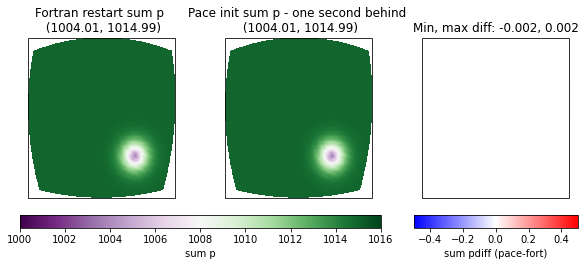

In [291]:
var_f = np.sum(delp, 2)/100.
var_p = np.sum(delpz[0], 2)/100.
var_diff = var_p - var_f
var = "sum p"
vmin, vmax = 1000, 1016
vmind, vmaxd = -5e-1, 5e-1
fig = plt.figure(figsize = (10, 3.5))
gs = GridSpec(2, 3, height_ratios=[1, .08])
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180))
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.Robinson(central_longitude=180))
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.Robinson(central_longitude=180))
cax1 = fig.add_subplot(gs[1, :2])
cax3 = fig.add_subplot(gs[1, 2])

f1 = ax1.pcolormesh(lon, lat, var_f, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
ax2.pcolormesh(lonz, latz, var_p, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
f3 = ax3.pcolormesh(lonz, latz, var_diff, vmin=vmind, vmax=vmaxd, cmap="bwr", transform=ccrs.PlateCarree())

ax1.set_title("Fortran restart %s \n (%.2f, %.2f)" % (var, var_f.min(), var_f.max()))
ax2.set_title("Pace init %s - one second behind \n (%.2f, %.2f)" % (var, var_p.min(), var_p.max()))
ax3.set_title("Min, max diff: %.3f, %.3f" % (var_diff.min(), var_diff.max()))

plt.colorbar(f1, cax=cax1, label=var, orientation="horizontal")
plt.colorbar(f3, cax=cax3, label=var+"diff (pace-fort)", orientation="horizontal")

plt.show()

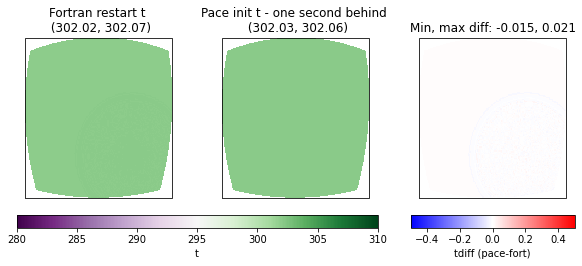

In [216]:
var_f = t
var_p = tz[0]
var_diff = var_p - var_f
var = "t"
vmin, vmax =280, 310
vmind, vmaxd = -5e-1, 5e-1
fig = plt.figure(figsize = (10, 3.5))
gs = GridSpec(2, 3, height_ratios=[1, .08])
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180))
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.Robinson(central_longitude=180))
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.Robinson(central_longitude=180))
cax1 = fig.add_subplot(gs[1, :2])
cax3 = fig.add_subplot(gs[1, 2])

f1 = ax1.pcolormesh(lon, lat, var_f, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
ax2.pcolormesh(lonz, latz, var_p, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
f3 = ax3.pcolormesh(lonz, latz, var_diff, vmin=vmind, vmax=vmaxd, cmap="bwr", transform=ccrs.PlateCarree())

ax1.set_title("Fortran restart %s \n (%.2f, %.2f)" % (var, var_f.min(), var_f.max()))
ax2.set_title("Pace init %s - one second behind \n (%.2f, %.2f)" % (var, var_p.min(), var_p.max()))
ax3.set_title("Min, max diff: %.3f, %.3f" % (var_diff.min(), var_diff.max()))

plt.colorbar(f1, cax=cax1, label=var, orientation="horizontal")
plt.colorbar(f3, cax=cax3, label=var+"diff (pace-fort)", orientation="horizontal")

plt.show()

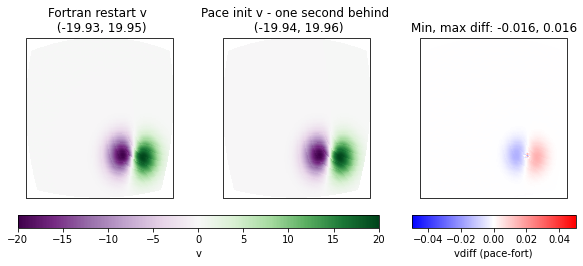

In [217]:
var_f = v
var_p = vz[0]
var_diff = var_p - var_f
var = "v"
vmin, vmax =-20, 20
vmind, vmaxd = -5e-2, 5e-2
fig = plt.figure(figsize = (10, 3.5))
gs = GridSpec(2, 3, height_ratios=[1, .08])
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180))
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.Robinson(central_longitude=180))
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.Robinson(central_longitude=180))
cax1 = fig.add_subplot(gs[1, :2])
cax3 = fig.add_subplot(gs[1, 2])

f1 = ax1.pcolormesh(lon, lat, var_f, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
ax2.pcolormesh(lonz, latz, var_p, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
f3 = ax3.pcolormesh(lonz, latz, var_diff, vmin=vmind, vmax=vmaxd, cmap="bwr", transform=ccrs.PlateCarree())

ax1.set_title("Fortran restart %s \n (%.2f, %.2f)" % (var, var_f.min(), var_f.max()))
ax2.set_title("Pace init %s - one second behind \n (%.2f, %.2f)" % (var, var_p.min(), var_p.max()))
ax3.set_title("Min, max diff: %.3f, %.3f" % (var_diff.min(), var_diff.max()))

plt.colorbar(f1, cax=cax1, label=var, orientation="horizontal")
plt.colorbar(f3, cax=cax3, label=var+"diff (pace-fort)", orientation="horizontal")

plt.show()

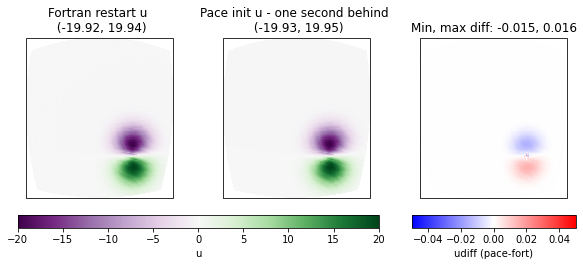

In [218]:
var_f = u
var_p = uz[0]
var_diff = var_p - var_f
var = "u"
vmin, vmax =-20, 20
vmind, vmaxd = -5e-2, 5e-2
fig = plt.figure(figsize = (10, 3.5))
gs = GridSpec(2, 3, height_ratios=[1, .08])
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180))
ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.Robinson(central_longitude=180))
ax3 = fig.add_subplot(gs[0, 2], projection=ccrs.Robinson(central_longitude=180))
cax1 = fig.add_subplot(gs[1, :2])
cax3 = fig.add_subplot(gs[1, 2])

f1 = ax1.pcolormesh(lon, lat, var_f, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
ax2.pcolormesh(lonz, latz, var_p, vmin=vmin, vmax=vmax, cmap="PRGn", transform=ccrs.PlateCarree())
f3 = ax3.pcolormesh(lonz, latz, var_diff, vmin=vmind, vmax=vmaxd, cmap="bwr", transform=ccrs.PlateCarree())

ax1.set_title("Fortran restart %s \n (%.2f, %.2f)" % (var, var_f.min(), var_f.max()))
ax2.set_title("Pace init %s - one second behind \n (%.2f, %.2f)" % (var, var_p.min(), var_p.max()))
ax3.set_title("Min, max diff: %.3f, %.3f" % (var_diff.min(), var_diff.max()))

plt.colorbar(f1, cax=cax1, label=var, orientation="horizontal")
plt.colorbar(f3, cax=cax3, label=var+"diff (pace-fort)", orientation="horizontal")

plt.show()

In [245]:
tropical_c128_input_restart = '/home/ajdas/pace/restart_data/v5.0/fv_core.res.tile6.nc'
data = Dataset(tropical_c128_input_restart, "r")
dp = np.array(data["delp"][0])

dp_sum = np.sum(dp, 0)



In [249]:
delp.shape

(128, 128)

In [248]:
dp_sum.min(), dp_sum.max()

(100401.31, 101498.89)